In [11]:
# Only Water Vapor + Dioxygen

import pycal
from pycal import Weather
from pycal._libcal import atm_atmospheric_loading
from pycal._libcal import atm_atmospheric_loading_vec
from pycal._libcal import atm_absorption_coefficient
from pycal._libcal import atm_absorption_coefficient_vec

import matplotlib.pylab as plt

import datetime as dt
import numpy as np
from yaml import load, Loader
from mpi4py import MPI
from scipy.integrate import simps
from time import perf_counter

In [12]:
year  = 2022
month = 5
day   = 15
hour  = 12
prime = 0
sec   = 0

In [13]:
weather = pycal.Weather("weather_STRIP.fits", 0, 0)

In [14]:
data = dt.datetime(year,month,day,hour,prime,sec)
weather.set_time(data.timestamp())

In [15]:
# Get surface temperature
t0 = weather.surface_temperature
# Get surface pressure
p0 = weather.surface_pressure
# Get Precipitable Water Vopour
pwv = weather.pwv

f_min = 0.1  # GHz
f_max = 40.0 # GHz

In [16]:
tsky_arr = atm_atmospheric_loading_vec(2390, t0, p0, pwv, f_min, f_max, 100)

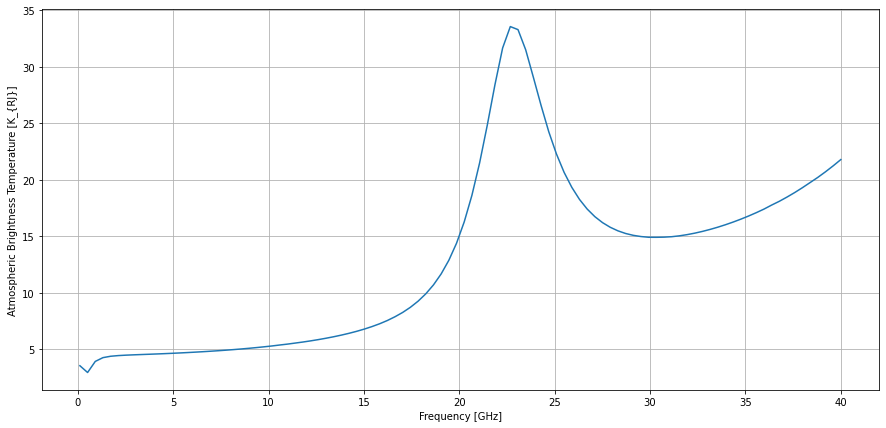

In [17]:
plt.figure(figsize=(15,7))
plt.xlabel("Frequency [GHz]")
plt.ylabel("Atmospheric Brightness Temperature [K_{RJ}]")
plt.plot(np.linspace(f_min, f_max, 100), tsky_arr)
plt.grid()